<a href="https://colab.research.google.com/github/Priti-Kannaujiya/DeepLearning-FromScratch/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=200,n_features=2,n_informative=2,n_classes=2,n_redundant=0,random_state=42)

In [ ]:
X

array([[ 1.68976749e+00, -1.40824123e+00],
       [ 1.53028665e+00, -1.45984815e+00],
       [-1.17504152e+00, -1.44763291e+00],
       [-2.58539507e+00,  9.63532238e-01],
       [ 1.37224580e+00,  4.40695372e-01],
       [ 7.31936138e-01,  8.49752970e-01],
       [-2.10684207e+00, -1.56005160e-01],
       [-9.36016045e-01,  5.43282487e-01],
       [-1.64699537e+00,  4.93409195e-01],
       [ 4.25361481e-01,  2.41426917e-01],
       [ 8.55819924e-01, -4.30645568e-01],
       [ 1.67660005e+00, -1.71348441e+00],
       [-2.06987792e+00,  2.52602241e-01],
       [-7.95777151e-01,  4.93854713e-02],
       [ 1.77079592e+00,  1.53557656e+00],
       [ 3.65788291e-01,  2.23297154e+00],
       [-5.27587135e-02, -2.18236826e+00],
       [ 5.74030019e-01,  4.47236811e-01],
       [-1.06467498e+00, -7.52371616e-01],
       [ 2.24658823e+00, -1.51455024e+00],
       [-6.28449323e-01, -2.07252229e-01],
       [-1.75906144e+00,  7.58449497e-01],
       [-1.15587568e+00, -1.94994197e+00],
       [ 8.

In [ ]:
y

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

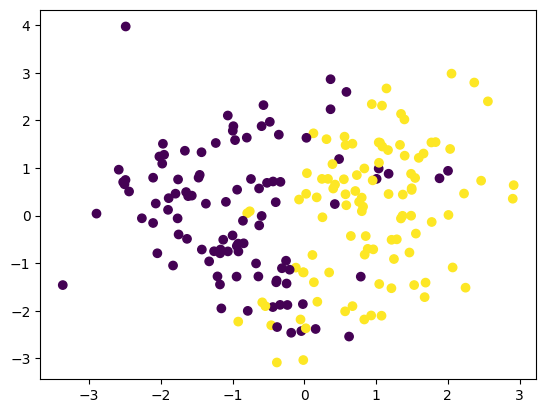

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model=Sequential([
    Dense(128,activation='relu',input_dim=2),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=500,verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6905 - loss: 0.6642 - val_accuracy: 0.7250 - val_loss: 0.6322
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8646 - loss: 0.5613 - val_accuracy: 0.8250 - val_loss: 0.5811
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8987 - loss: 0.4710 - val_accuracy: 0.8000 - val_loss: 0.5452
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8589 - loss: 0.4287 - val_accuracy: 0.8250 - val_loss: 0.5213
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8671 - loss: 0.3789 - val_accuracy: 0.8000 - val_loss: 0.5138
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8537 - loss: 0.3609 - val_accuracy: 0.8000 - val_loss: 0.5156
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8954 - loss: 0.2858 - val_accuracy: 0.8250 - val_loss: 0.5249
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9010 - loss: 0.2547 - val_accuracy: 0.8250 - val_loss:

In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

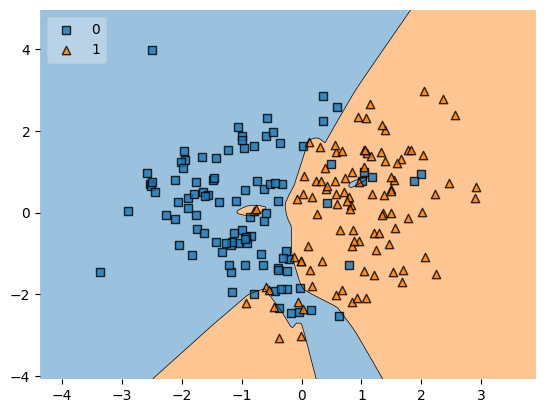

In [ ]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

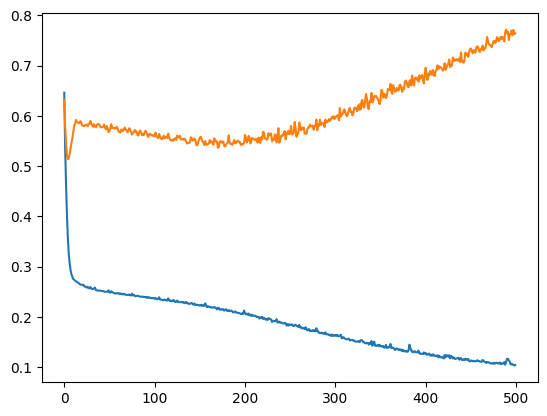

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#**USING DROPOUT**

In [ ]:
model2=Sequential([
      Dense(128,activation='relu',input_dim=2),
      Dropout(0.5),
      Dense(128,activation='relu'),
      Dropout(0.5),
      Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(X,y,epochs=500,validation_split=0.2,verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5245 - loss: 0.6941 - val_accuracy: 0.8250 - val_loss: 0.6564
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7233 - loss: 0.6231 - val_accuracy: 0.8000 - val_loss: 0.6143
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8384 - loss: 0.5515 - val_accuracy: 0.7750 - val_loss: 0.5810
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8683 - loss: 0.4836 - val_accuracy: 0.7750 - val_loss: 0.5532
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8533 - loss: 0.4641 - val_accuracy: 0.8250 - val_loss: 0.5326
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8580 - loss: 0.4020 - val_accuracy: 0.8250 - val_loss: 0.5187
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8661 - loss: 0.3924 - val_accuracy: 0.8250 - val_loss: 0.5142
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8702 - loss: 0.3424 - val_accuracy: 0.8250 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

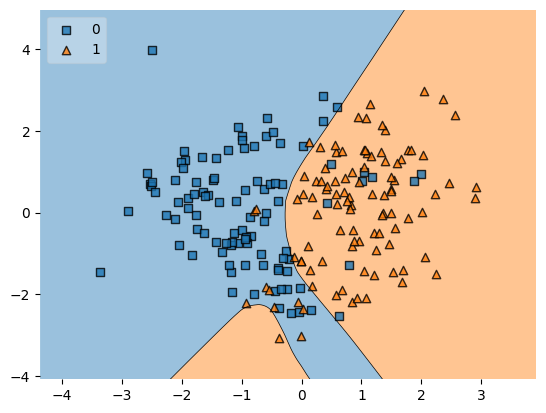

In [ ]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)